<a href="https://colab.research.google.com/github/dngdat/AI/blob/main/w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-4-baae9e06a612>:58: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-baae9e06a612>:59: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-4-baae9e06a612>:60: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


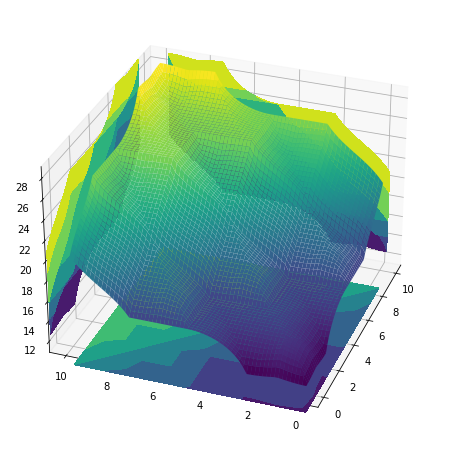

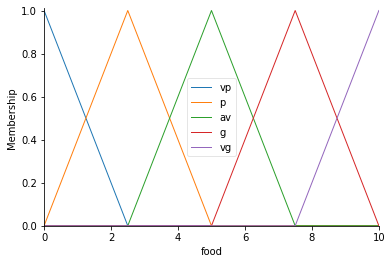

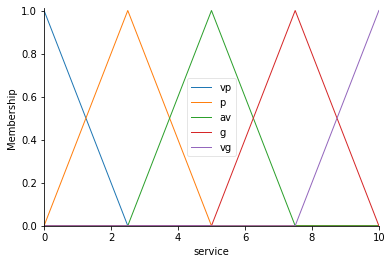

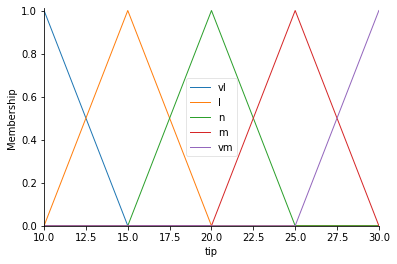

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

universe = np.linspace(0, 10, 61)
universe1 = np.linspace(10, 30, 61)

food = ctrl.Antecedent(universe, 'food')
service = ctrl.Antecedent(universe, 'service')
tip = ctrl.Consequent(universe1, 'tip')

names = ['vp', 'p', 'av', 'g', 'vg']
names1 = ['vl', 'l', 'n', 'm', 'vm']

food.automf(names = names)
service.automf(names = names)
tip.automf(names = names1)

rule0 = ctrl.Rule(antecedent = ((food['vp'] & service['vp'])|(food['p'] & service['vp'])|
                                (food['vp'] & service['p'])), consequent = tip['vl'], label = 'rule vl')

rule1 = ctrl.Rule(antecedent = ((food['vp'] & service['av'])|(food['vp'] & service['g'])|
                                (food['p'] & service['p'])|(food['p'] & service['av'])|
                                (food['av'] & service['vp'])|(food['av'] & service['p'])|
                                (food['g'] & service['vp'])), consequent = tip['l'], label = 'rule l')

rule2 = ctrl.Rule(antecedent = ((food['vp'] & service['vg'])|(food['p'] & service['g'])|
                                (food['av'] & service['av'])|(food['g'] & service['p'])|
                                (food['vg'] & service['vp'])), consequent = tip['n'], label = 'rule n')


rule3 = ctrl.Rule(antecedent = ((food['p'] & service['vg'])|(food['av'] & service['g'])|(food['av'] & service['vg'])|
                                (food['g'] & service['av'])|(food['g'] & service['g'])|
                                (food['vg'] & service['p'])|(food['vg'] & service['av'])), consequent = tip['m'], label = 'rule m')

rule4 = ctrl.Rule(antecedent = ((food['vg'] & service['vg'])|(food['vg'] & service['g'])|
                                (food['g'] & service['vg'])), consequent = tip['vm'], label = 'rule vm')

system = ctrl.ControlSystem(rules = [rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0, 10, 61) #tạo lưới
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i, j]
    sim.input['service'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['tip']

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 8)) # (8, 8) độ phân giải
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)

food.view()
service.view()
tip.view()

DIEU KHIEN CON LAC NGUOC

<ipython-input-8-226cb5f18f90>:59: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-8-226cb5f18f90>:60: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-8-226cb5f18f90>:61: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


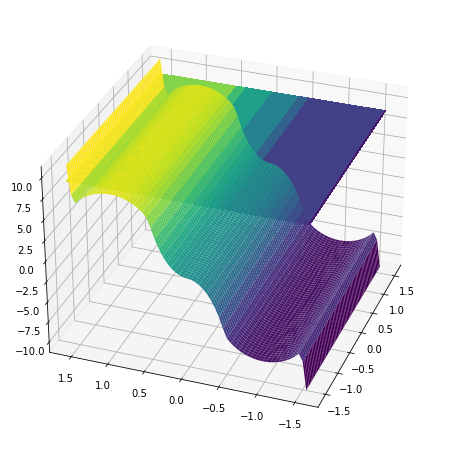

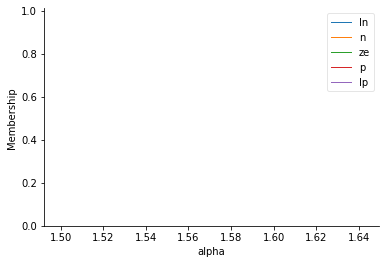

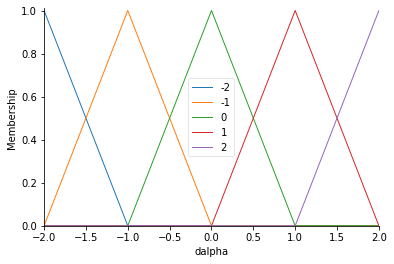

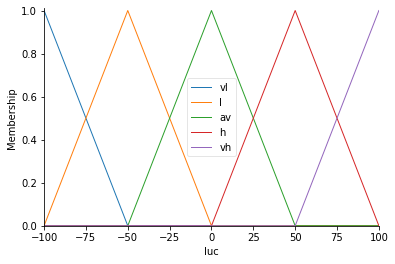

In [ ]:
import numpy as np
import skfuzzy as fuzz
import math
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

universe_alpha = np.linspace((math.pi/2), (math.pi/2), 61)
universe_dalpha = np.linspace(-2, 2, 61)
universe_luc = np.linspace(-100, 100, 61)

alpha = ctrl.Antecedent(universe_alpha, 'alpha')
dalpha = ctrl.Antecedent(universe_dalpha, 'dalpha')
luc = ctrl.Consequent(universe_luc, 'luc')

names = ['ln', 'n', 'ze', 'p', 'lp']
names1 = ['-2', '-1', '0', '1', '2']
names2 = ['vl', 'l', 'av', 'h', 'vh']

alpha.automf(names = names)
dalpha.automf(names = names1)
luc.automf(names = names2)

rule0 = ctrl.Rule(antecedent = ((alpha['ln'] & dalpha['-2'])|(alpha['ln'] & dalpha['-1'])|
                                (alpha['n'] & dalpha['-2'])), consequent = luc['vl'], label = 'rule vl')

rule1 = ctrl.Rule(antecedent = ((alpha['ze'] & dalpha['-2'])|(alpha['p'] & dalpha['-2'])|
                                (alpha['n'] & dalpha['-1'])|(alpha['ze'] & dalpha['-1'])|(alpha['ln'] & dalpha['0'])
                                |(alpha['n'] & dalpha['0'])|(alpha['ln'] & dalpha['1'])), consequent = luc['l'], label = 'rule l')

rule2 = ctrl.Rule(antecedent = ((alpha['lp'] & dalpha['-2'])|(alpha['p'] & dalpha['-1'])|
                                (alpha['ze'] & dalpha['0'])|(alpha['n'] & dalpha['1'])|
                                (alpha['ln'] & dalpha['2'])), consequent = luc['av'], label = 'rule av')

rule3 = ctrl.Rule(antecedent = ((alpha['lp'] & dalpha['-1'])|(alpha['lp'] & dalpha['0'])|
                                (alpha['p'] & dalpha['0'])|(alpha['p'] & dalpha['1'])|
                                (alpha['ze'] & dalpha['1'])|(alpha['n'] & dalpha['2'])|
                                (alpha['ze'] & dalpha['2'])), consequent = luc['h'], label = 'rule h')

rule4 = ctrl.Rule(antecedent = ((alpha['lp'] & dalpha['1'])|(alpha['lp'] & dalpha['2'])|
                                (alpha['p'] & dalpha['2'])), consequent = luc['vh'], label = 'rule vh')

system = ctrl.ControlSystem(rules = [rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(-(math.pi/2), (math.pi/2), 61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['alpha'] = x[i, j]
    sim.input['dalpha'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['luc']

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)

alpha.view()
dalpha.view()
luc.view()

DC SERVO

<ipython-input-10-10d586a48032>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-10-10d586a48032>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-10-10d586a48032>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


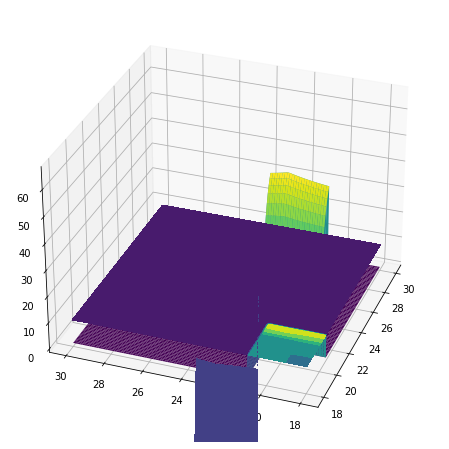

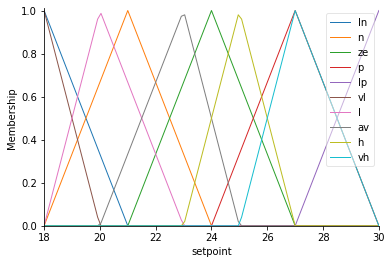

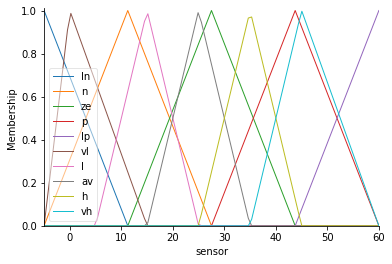

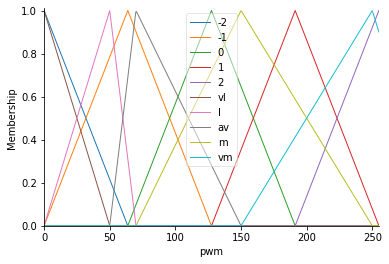

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

universe = np.linspace(18, 30, 101)
universe1 = np.linspace(-5, 60, 101)
universe2 = np.linspace(0, 255, 501)

setpoint = ctrl.Antecedent(universe,'setpoint')
sensor = ctrl.Antecedent(universe1,'sensor')
pwm = ctrl.Consequent(universe2,'pwm')

setpoint.automf(names = names)
sensor.automf(names = names)
pwm.automf(names = names1)

names = ['vl', 'l', 'av', 'h', 'vh']
names1 = ['vl', 'l', 'av', 'm', 'vm']

setpoint['vl'] = fuzzy.trimf(setpoint.universe,[18,18,20])
setpoint['l'] = fuzzy.trimf(setpoint.universe,[18,20,23])
setpoint['av']  = fuzzy.trimf(setpoint.universe,[20,23,25])
setpoint['h']  = fuzzy.trimf(setpoint.universe,[23,25,27])
setpoint['vh']  = fuzzy.trimf(setpoint.universe,[25,27,30])

sensor['vl'] = fuzzy.trimf(sensor.universe,[-5,0,15])
sensor['l'] = fuzzy.trimf(sensor.universe,[5,15,25])
sensor['av']  = fuzzy.trimf(sensor.universe,[15,25,35])
sensor['h'] = fuzzy.trimf(sensor.universe,[25,35,45])
sensor['vh'] = fuzzy.trimf(sensor.universe,[35,45,60])

pwm['vl'] = fuzzy.trimf(pwm.universe,[0,0,50])
pwm['l'] = fuzzy.trimf(pwm.universe,[0,50,70])
pwm['av']  = fuzzy.trimf(pwm.universe,[50,70,150])
pwm['m']  = fuzzy.trimf(pwm.universe,[70,150,250])
pwm['vm']  = fuzzy.trimf(pwm.universe,[150,250,300])

rule0 = ctrl.Rule(antecedent = ((setpoint['vl'] & sensor['vl'])|(setpoint['l'] & sensor['vl'])|
                                (setpoint['vl'] & sensor['l'])), consequent = pwm['vl'], label = 'rule vl')

rule1 = ctrl.Rule(antecedent = ((setpoint['vl'] & sensor['av'])|(setpoint['vl'] & sensor['h'])|
                                (setpoint['l'] & sensor['l'])|(setpoint['l'] & sensor['av'])|
                                (setpoint['av'] & sensor['vl'])|(setpoint['av'] & sensor['l'])|
                                (setpoint['h'] & sensor['vl'])), consequent = pwm['l'], label = 'rule l')

rule2 = ctrl.Rule(antecedent = ((setpoint['vl'] & sensor['vh'])|(setpoint['l'] & sensor['h'])|
                                (setpoint['av'] & sensor['av'])|(setpoint['h'] & sensor['l'])|
                                (setpoint['vh'] & sensor['vl'])), consequent = pwm['av'], label = 'rule av')


rule3 = ctrl.Rule(antecedent = ((setpoint['l'] & sensor['vh'])|(setpoint['av'] & sensor['h'])|(setpoint['av'] & sensor['vh'])|
                                (setpoint['h'] & sensor['av'])|(setpoint['h'] & sensor['h'])|
                                (setpoint['vh'] & sensor['l'])|(setpoint['vh'] & sensor['av'])), consequent = pwm['m'], label = 'rule m')

rule4 = ctrl.Rule(antecedent = ((setpoint['vh'] & sensor['vh'])|(setpoint['vh'] & sensor['h'])|
                                (setpoint['h'] & sensor['vh'])), consequent = pwm['vm'], label = 'rule vm')

system = ctrl.ControlSystem(rules = [rule0, rule1, rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 101*101+1)

upsampled = np.linspace(18, 30, 101)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(25):
  for j in range(25):
    sim.input['setpoint'] = x[i, j]
    sim.input['sensor'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['pwm']

fig = plt.figure(figsize = (8, 8)) 
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30, 200)

setpoint.view()
sensor.view()
pwm.view()